# EX4 — Bandas “Filho” (Item 4): Identificação, Áreas Integradas e Gráficos

**O que o Item 4 pede:**
- **4.1** Identificar, no OMNIC, as bandas “filho” nos picos-alvo: **781, 1040, 1702, 1718, 2139 cm⁻¹** e apontar as possíveis substâncias.
- **4.2** Determinar as **áreas integradas** dessas bandas (em **abs·cm⁻¹**), a partir dos espectros em **Absorbance**.
- **4.3** Gerar os gráficos:
  - **4.3.1** Área (abs·cm⁻¹) × **Fluência** (íons·cm⁻²)
  - **4.3.2** **Densidade de coluna** *N* (moléculas·cm⁻²) × **Fluência** (íons·cm⁻²)

**Por que Python (Jupyter) em vez do Origin (sugerido pelo professor)?**  
Aqui usamos Python para:
1) **Reprodutibilidade** — o código documenta todas as etapas;  
2) **Transparência** — fica explícito **como** as áreas foram convertidas em *N*;  
3) **Automação** — ao inserir novas fluências/áreas, os gráficos se atualizam rapidamente.

**Unidades & Fórmulas (linhas gerais):**
- As áreas integradas extraídas do OMNIC, em espectros **Absorbance**, têm unidade **abs·cm⁻¹** (absorbância adimensional × cm⁻¹).
- Para obter a densidade de coluna **N** (moléculas·cm⁻²) a partir da área integrada de uma banda IR, usamos:

\[
\boxed{N \;=\; \frac{\ln 10}{A}\,\int A(\tilde\nu)\,d\tilde\nu}
\]

onde:
- \( \int A(\tilde\nu)\,d\tilde\nu \) é a **área integrada em absorbância** (abs·cm⁻¹);  
- \( \ln 10 \) converte **absorbance** → **optical depth** (\(\tau = \ln 10 \cdot \text{Abs}\));  
- **A** é o *band strength* da banda (em **cm·molec⁻¹**), que depende de molécula, modo, matriz e temperatura.

> **Observação importante:** Para o gráfico **4.3.2 (N × Fluência)** é indispensável informar **A-values** da literatura para o pico escolhido. Aqui deixamos **valores de demonstração** apenas para o gráfico rodar; substitua pelos **A-values corretos** quando definir a espécie/banda (ex.: CO 2139 cm⁻¹, O₃ 1040 cm⁻¹ etc.).

A seguir, as células de código:
- carregam os **dados das áreas** (do .txt) para a fluência **2,5×10¹⁰**;
- fazem o **gráfico 4.3.1** (Área × Fluência);
- convertem **Área → N** com um **A-value** (editável) e plotam **4.3.2 (N × Fluência)**.


In [10]:
# Picos-alvo (cm^-1)
picos_cm1 = [781, 1040, 1702, 1718, 2139]

# Áreas integradas (abs·cm^-1) obtidas do OMNIC/Peak Resolve (fluência 2,5×10^10)
# -> Substitua/complete com novas fluências conforme medir
areas_por_fluencia = {
    2.5e10: {781: 0.0031, 1040: 0.0017, 1702: 0.0011, 1718: 0.0008, 2139: 0.0028},
    # Ex.: 1.0e10: {781: ..., 1040: ..., 1702: ..., 1718: ..., 2139: ...},
    #      5.0e10: {781: ..., 1040: ..., 1702: ..., 1718: ..., 2139: ...},
}

import pandas as pd, numpy as np

# Constrói DataFrame "longo" (fluência, pico, área)
linhas = []
for flu, d in areas_por_fluencia.items():
    for pico in picos_cm1:
        linhas.append({"fluencia": float(flu), "pico": pico, "area_abs_cm_1": d.get(pico, np.nan)})
df_areas = pd.DataFrame(linhas).sort_values(["pico","fluencia"]).reset_index(drop=True)

df_areas.head()


,fluencia,pico,area_abs_cm_1
0,2.500000e+10,781,0.0031
1,2.500000e+10,1040,0.0017
2,2.500000e+10,1702,0.0011
3,2.500000e+10,1718,0.0008
4,2.500000e+10,2139,0.0028


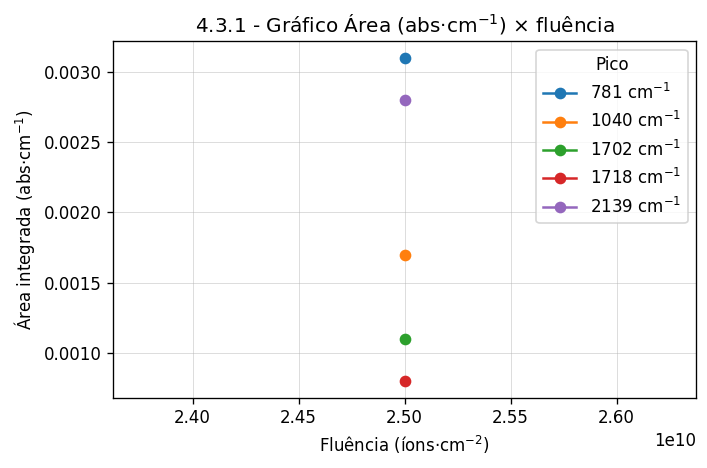

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=120)

# Um traço por pico; com uma única fluência, cada traço terá um ponto.
for pico in sorted(df_areas["pico"].unique()):
    dd = df_areas[df_areas["pico"] == pico].sort_values("fluencia")
    plt.plot(dd["fluencia"], dd["area_abs_cm_1"], marker="o", label=f"{pico} cm$^{{-1}}$")

plt.xlabel("Fluência (íons·cm$^{-2}$)")
plt.ylabel("Área integrada (abs·cm$^{-1}$)")
plt.title("4.3.1 - Gráfico Área (abs·cm$^{-1}$) × fluência")
plt.legend(title="Pico")
plt.grid(True, which="both", linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
# === ENTRADA: band strengths (A) por pico (cm·molec^-1) ===
# ATENÇÃO: preencha com valores da literatura compatíveis com molécula, modo e condições experimentais.
# Abaixo estão valores de DEMONSTRAÇÃO (iguais), apenas para o gráfico rodar.
A_values = {
    781: 1.0e-17,   # SUBSTITUA (NOx ~ δ(NO2), matriz, T)
    1040: 1.0e-17,  # SUBSTITUA (O3 ν3)
    1702: 1.0e-17,  # SUBSTITUA (N2O5)
    1718: 1.0e-17,  # SUBSTITUA (NOx em sítio vizinho)
    2139: 1.0e-17,  # SUBSTITUA (CO ν)
}

alvo_pico_cm1 = 2139  # escolha: 781, 1040, 1702, 1718, 2139

# === Cálculo de N a partir da área em absorbância ===
LN10 = np.log(10.0)
dfN = df_areas.copy()
dfN["A_cm_per_molec"] = dfN["pico"].map(A_values)
dfN["tau_area_cm_1"]  = dfN["area_abs_cm_1"] * LN10
dfN["N_molec_cm2"]    = dfN["tau_area_cm_1"] / dfN["A_cm_per_molec"]

dfN_alvo = dfN[dfN["pico"] == alvo_pico_cm1].sort_values("fluencia").reset_index(drop=True)

print("Prévia (todas as linhas):")
display(dfN.head())

print(f"\nFiltrado para pico {alvo_pico_cm1} cm^-1:")
display(dfN_alvo)


Prévia (todas as linhas):


,fluencia,pico,area_abs_cm_1,A_cm_per_molec,tau_area_cm_1,N_molec_cm2
0,2.500000e+10,781,0.0031,1.000000e-17,0.007138,7.138014e+14
1,2.500000e+10,1040,0.0017,1.000000e-17,0.003914,3.914395e+14
2,2.500000e+10,1702,0.0011,1.000000e-17,0.002533,2.532844e+14
3,2.500000e+10,1718,0.0008,1.000000e-17,0.001842,1.842068e+14
4,2.500000e+10,2139,0.0028,1.000000e-17,0.006447,6.447238e+14



Filtrado para pico 2139 cm^-1:


,fluencia,pico,area_abs_cm_1,A_cm_per_molec,tau_area_cm_1,N_molec_cm2
0,2.500000e+10,2139,0.0028,1.000000e-17,0.006447,6.447238e+14


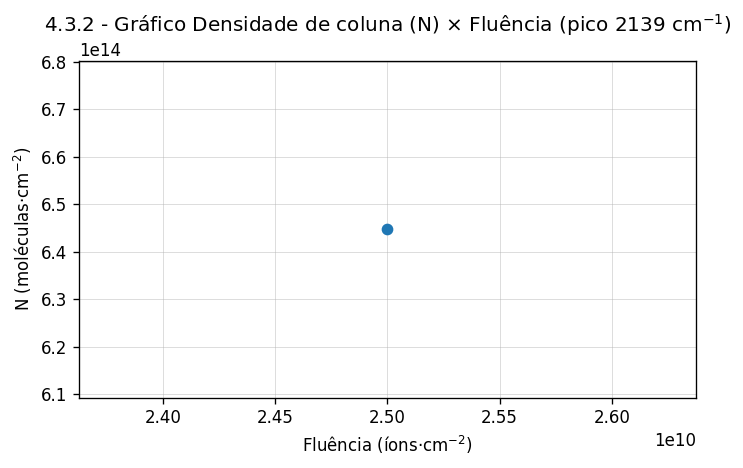

In [15]:
plt.figure(figsize=(6,4), dpi=120)

if not dfN_alvo.empty and np.isfinite(dfN_alvo["N_molec_cm2"]).any():
    plt.plot(dfN_alvo["fluencia"], dfN_alvo["N_molec_cm2"], marker="o")
    plt.ylabel("N (moléculas·cm$^{-2}$)")
else:
    plt.plot([], [])
    plt.text(0.5, 0.5,
             "Sem dados numéricos de N.\nDefina A_values corretos (cm·molec⁻¹)\npara o pico escolhido.",
             ha="center", va="center", transform=plt.gca().transAxes)
    plt.ylabel("N (moléculas·cm$^{-2}$)")

plt.xlabel("Fluência (íons·cm$^{-2}$)")
plt.title(f"4.3.2 - Gráfico Densidade de coluna (N) × Fluência (pico {alvo_pico_cm1} cm$^{{-1}}$)")
plt.grid(True, which="both", linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()
